In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Plot ageb energieverbräuche

In [101]:
# insgesamt
d = {'Industrie': [5.8, 0.7, 67.0, 0.7, 1.5, 21.8, 1.2, 1.3], 'GHD': [43.7, 5.3, 7.9, 1.1, 4.0, 18.2, 7.3, 12.5]}
df = pd.DataFrame(data=d, index= ['Raumwärme', 'Warmwasser', 'Prozesswärme', 'Klimakälte', 'Prozesskälte', 'Mechanische Energie', 'IKT', 'Beleuchtung'] )
df

,Industrie,GHD
Raumwärme,5.8,43.7
Warmwasser,0.7,5.3
Prozesswärme,67.0,7.9
Klimakälte,0.7,1.1
Prozesskälte,1.5,4.0
Mechanische Energie,21.8,18.2
IKT,1.2,7.3
Beleuchtung,1.3,12.5


In [102]:
# in TWh
ind_abs=round(2535.9/3.6,1)
ghd_abs=round(1342.3/3.6,1)

In [103]:
# Industrie
d = {'Strom': [0.3, 0.3, 17.1, 2.3, 4.7, 67.1, 4.0, 4.3], 'Gas': [9.7, 1.0, 86.6, 0, 0, 2.7, 0, 0]}
df_ind = pd.DataFrame(data=d, index= ['Raumwärme', 'Warmwasser', 'Prozesswärme', 'Klimakälte', 'Prozesskälte', 'Mechanische Energie', 'IKT', 'Beleuchtung'] )
df_ind

,Strom,Gas
Raumwärme,0.3,9.7
Warmwasser,0.3,1.0
Prozesswärme,17.1,86.6
Klimakälte,2.3,0.0
Prozesskälte,4.7,0.0
Mechanische Energie,67.1,2.7
IKT,4.0,0.0
Beleuchtung,4.3,0.0


In [104]:
# in TWh
ind_strom=round(784.7/3.6,1)
ind_gas=round(883.7/3.6,1)

In [105]:
# GHD
d = {'Strom': [4.6, 4.6, 5.6, 2.4, 10.0, 22.4, 18.5, 32.0], 'Gas': [82.1, 5.4, 11.4, 0.7, 0.1, 0.3, 0, 0]}
df_ghd = pd.DataFrame(data=d, index= ['Raumwärme', 'Warmwasser', 'Prozesswärme', 'Klimakälte', 'Prozesskälte', 'Mechanische Energie', 'IKT', 'Beleuchtung'] )
df_ghd

,Strom,Gas
Raumwärme,4.6,82.1
Warmwasser,4.6,5.4
Prozesswärme,5.6,11.4
Klimakälte,2.4,0.7
Prozesskälte,10.0,0.1
Mechanische Energie,22.4,0.3
IKT,18.5,0.0
Beleuchtung,32.0,0.0


In [106]:
# in TWh
ghd_strom=round(526.8/3.6,1)
ghd_gas=round(367.7/3.6,1)

### 1.1 plot

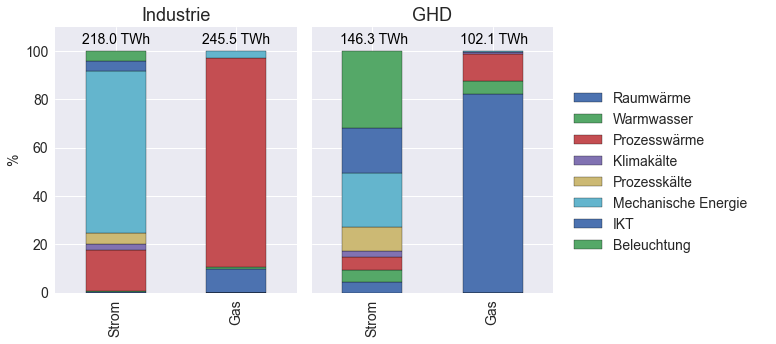

In [122]:
plt.rcParams.update( {'font.size': 14})

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,5), sharey=True)

plt.style.use('seaborn')
df_ind.T.plot(ax=ax1,kind='bar', stacked=True, legend=False, edgecolor="black")
df_ghd.T.plot(ax=ax2,kind='bar', stacked=True, legend=False, edgecolor="black")

ax1.set_title('Industrie', fontsize=18)
ax2.set_title('GHD', fontsize=18)


ax1.set_ylim(0,110)
# ax1.grid(axis='y', color='grey', linestyle='--', linewidth=0.2)
# ax2.grid(axis='y', color='grey', linestyle='--', linewidth=0.2)
ax1.set_ylabel('%', fontsize=14)
ax1.tick_params(axis='both', labelsize=14) 
ax2.tick_params(axis='both', labelsize=14) 

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.0, 0.5, 0.35, 0), loc='center left',
          ncol=1, mode="expand", borderaxespad=0., fontsize=14)

plt.tight_layout()
plt.text(0.25, 0.95, (str(ind_strom)+' TWh'), transform=ax1.transAxes,  verticalalignment='center', horizontalalignment='center', color='black', fontsize=14)
plt.text(0.75, 0.95, (str(ind_gas)+' TWh'), transform=ax1.transAxes,  verticalalignment='center', horizontalalignment='center', color='black', fontsize=14)
plt.text(1.32, 0.95, (str(ghd_strom)+' TWh'), transform=ax1.transAxes,  verticalalignment='center', horizontalalignment='center', color='black', fontsize=14)
plt.text(1.82, 0.95, (str(ghd_gas)+' TWh'), transform=ax1.transAxes,  verticalalignment='center', horizontalalignment='center', color='black', fontsize=14)
plt.yticks(fontsize=200) 

plt.savefig('./Plots/Verbrauch_Anwendungen_2019.png', bbox_inches="tight", dpi=150)

Text(0.75, 0.5, '372.9 TWh')

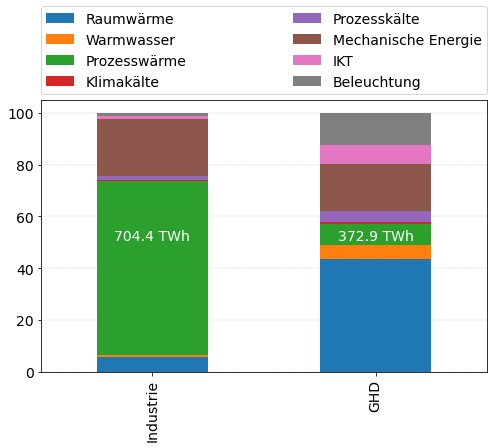

In [54]:
plt.rcParams.update({'font.size': 14})

figure, ax = plt.subplots(figsize=(8,5))


df.T.plot(ax=ax, kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
plt.grid(axis='y', color='grey', linestyle='--', linewidth=0.2)
plt.text(0.25, 0.5, (str(ind_abs)+' TWh'), transform=ax.transAxes,  verticalalignment='center', horizontalalignment='center', color='w')
plt.text(0.75, 0.5, (str(ghd_abs)+' TWh'), transform=ax.transAxes,  verticalalignment='center', horizontalalignment='center', color='w')

## Plot ENTSO-E

In [152]:
year=2019
entsoe = pd.read_csv('./Data/entsoe_'+str(year)+'.csv', sep = ',', index_col=0, parse_dates=True, infer_datetime_format=True)
entsoe.tail()

,Actual Total Load [MW]
Time (CET),
31.12.2019 22:45 - 31.12.2019 23:00,45028.0
31.12.2019 23:00 - 31.12.2019 23:15,44540.0
31.12.2019 23:15 - 31.12.2019 23:30,44217.0
31.12.2019 23:30 - 31.12.2019 23:45,43673.0
31.12.2019 23:45 - 01.01.2020 00:00,43445.0


In [153]:
dt_index = pd.date_range(start= str(year) + '-01-01 00:00:00', end= str(year+1)+'-12-31 23:45:00', freq="15T")


In [87]:
dt_index = pd.date_range(start= str(year) + '-01-01 00:15:00', end= str(year+1)+'-01-01 00:00:00', freq="15T")
df_entsoe_load = pd.DataFrame(index=dt_index)
df_entsoe_load['ENTSO-E Actual Load [GW]'] = (entsoe['Actual Total Load [MW]'].values)/1000 # in GW

In [88]:
int(round(df_entsoe_load.sum()/4000,1))

490

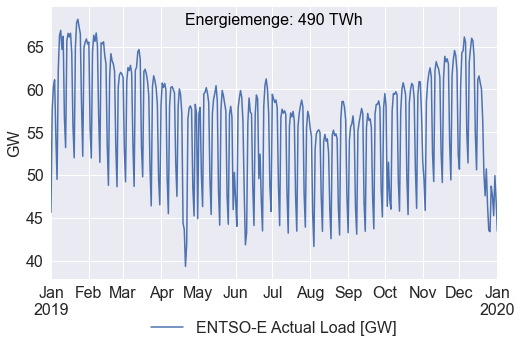

In [100]:
plt.rcParams.update({'font.size': 16})
plt.style.use('seaborn')

figure, ax = plt.subplots(figsize=(8,5))
df_entsoe_load.resample('D').mean().plot(ax=ax, linewidth=1.5)
ax.tick_params(axis='both', labelsize=16) 
#ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.2)
ax.set_ylabel('GW', fontsize=16)
ax.legend(fontsize=16, bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=2)
plt.text(0.5, 0.95, ('Energiemenge: ' + str(int(round(df_entsoe_load.sum()/4000,1)))+' TWh'), transform=ax.transAxes,  verticalalignment='center', horizontalalignment='center', color='black')

plt.savefig('./Plots/entsoe_'+str(year)+'.png', bbox_inches="tight", dpi=150)

## Plot ENTSO-G

In [2]:
import datetime as dt

In [3]:
ncg_exit = pd.read_excel('./Data/NCG_Exit_2015.xlsx')

In [4]:
df_ncf = ncg_exit.loc[ncg_exit['adjacentSystemsKey'] == 'Final Consumers'][['value', 'year', 'month', 'day']]
df_ncf['Timestamp'] = df_ncf.apply(lambda row: dt.datetime(int(row.year), int(row.month), int(row.day)), axis=1)
df_ncf = df_ncf[['Timestamp','value']].groupby('Timestamp').sum()/1000000 # in GWh
df_ncf.rename(columns={'value' : 'NCG physical flow to final consumers [GWh/day]'}, inplace=True)

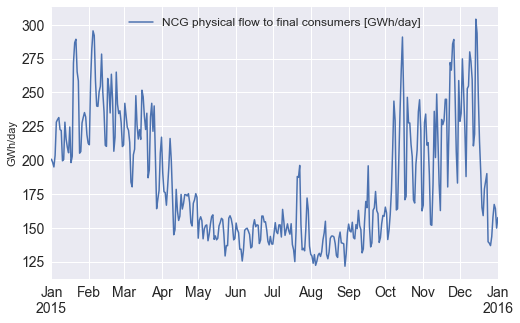

In [222]:
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn')

figure, ax = plt.subplots(figsize=(8,5))
df_ncf.plot(ax=ax, linewidth=1.5)
ax.tick_params(axis='both', labelsize=14) 
#ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.2)
ax.set_ylabel('GWh/day')
ax.set_xlabel(None)
ax.legend(fontsize=12)

plt.savefig('./Plots/entsog_ncg_2015.png', bbox_inches="tight")

In [5]:
gaspool_exit = pd.read_excel('./Data/gaspool_Exit_2015.xlsx')

In [6]:
df_gp = gaspool_exit.loc[gaspool_exit['adjacentSystemsKey'] == 'Final Consumers'][['value', 'year', 'month', 'day']]
df_gp['Timestamp'] = df_gp.apply(lambda row: dt.datetime(int(row.year), int(row.month), int(row.day)), axis=1)
df_gp = df_gp[['Timestamp','value']].groupby('Timestamp').sum()/1000000 # in GWh
df_gp.rename(columns={'value' : 'Gaspool physical flow to final consumers [GWh/day]'}, inplace=True)

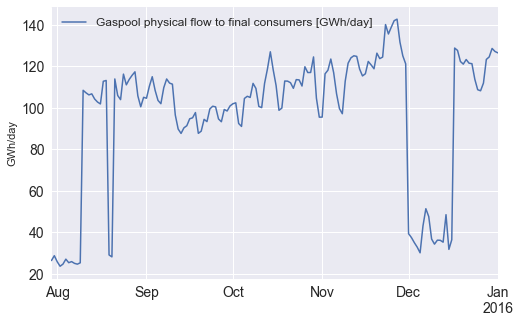

In [223]:
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn')

figure, ax = plt.subplots(figsize=(8,5))
df_gp.plot(ax=ax, linewidth=1.5)
ax.tick_params(axis='both', labelsize=14) 
#ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.2)
ax.set_ylabel('GWh/day')
ax.set_xlabel(None)
ax.legend(fontsize=12)

plt.savefig('./Plots/entsog_gaspool_2015.png', bbox_inches="tight")

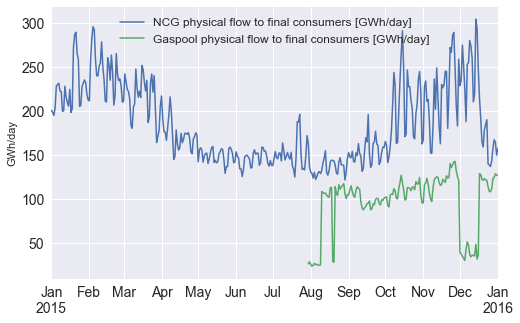

In [224]:
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn')

figure, ax = plt.subplots(figsize=(8,5))
df_ncf.join(df_gp).plot(ax=ax, linewidth=1.5)
ax.tick_params(axis='both', labelsize=14) 
#ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.2)
ax.set_ylabel('GWh/day')
ax.set_xlabel(None)
ax.legend(fontsize=12)

plt.savefig('./Plots/entsog_ncg+gaspool_2015.png', bbox_inches="tight")

In [3]:
final_consumers = pd.read_excel('./Data/gaspool_NCG_Exit_consumers_2015-2020.xlsx')

In [4]:
df_fc = final_consumers[['value', 'year', 'month', 'day', 'operatorLabel']]
df_fc['Timestamp'] = df_fc.apply(lambda row: dt.datetime(int(row.year), int(row.month), int(row.day)), axis=1)
df_fc = pd.pivot_table(df_fc, values='value', index=['Timestamp'], columns=['operatorLabel'], aggfunc=np.sum)/1000000 # in GWh
df_fc

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


operatorLabel,GASCADE Gastransport GmbH,Gastransport Nord GmbH,Gasunie Deutschland Transport Services GmbH,Nowega GmbH,ONTRAS Gastransport GmbH,Open Grid Europe GmbH,Thyssengas GmbH,bayernets GmbH,terranets bw GmbH
Timestamp,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,128.255686,16.269916,54.293754,1.794232
2015-01-02,NaN,NaN,NaN,NaN,NaN,125.111131,18.089037,53.122499,1.895120
2015-01-03,NaN,NaN,NaN,NaN,NaN,121.997281,19.045239,51.917218,1.941129
2015-01-04,NaN,NaN,NaN,NaN,NaN,128.358272,19.846933,53.329002,1.920484
2015-01-05,NaN,NaN,NaN,NaN,NaN,146.818599,24.287956,54.801326,2.135593
...,...,...,...,...,...,...,...,...,...
2020-12-28,0.0,0.598736,33.436237,14.908619,106.205147,130.585711,21.729397,33.834215,3.726577
2020-12-29,0.0,0.528875,33.737316,14.826335,111.812031,135.022953,22.449845,32.204510,3.810000
2020-12-30,0.0,0.311331,33.389160,14.803485,111.355255,133.032327,21.313918,31.973707,3.861662


In [15]:
df_fc.loc[df_fc.index.year<2021].resample('Y').sum().set_index(df_fc.loc[df_fc.index.year<2021].resample('Y').sum().index.year).sum(axis=1)

Timestamp
2015     82351.944411
2016    124974.244254
2017    125278.272165
2018    111804.132748
2019    141581.080134
2020    174125.168268
dtype: float64

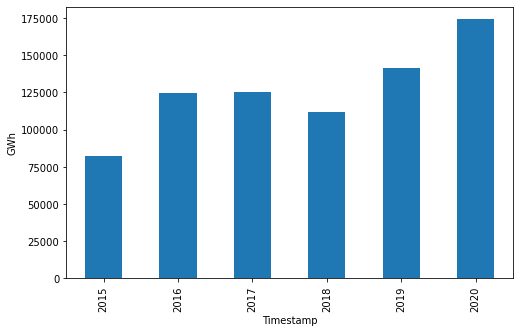

In [18]:
figure, ax = plt.subplots(figsize=(8,5))
(df_fc.loc[df_fc.index.year<2021]
 .resample('Y').sum()
 .set_index(df_fc.loc[df_fc.index.year<2021].resample('Y').sum().index.year)
 .sum(axis=1)
 .plot(kind='bar'))
ax.set_ylabel('GWh')
plt.savefig('./Plots/exits_NCG_gaspool_total_per_year.png', bbox_inches="tight", dpi=150)

In [150]:
(2182.5)/3.6

606.25

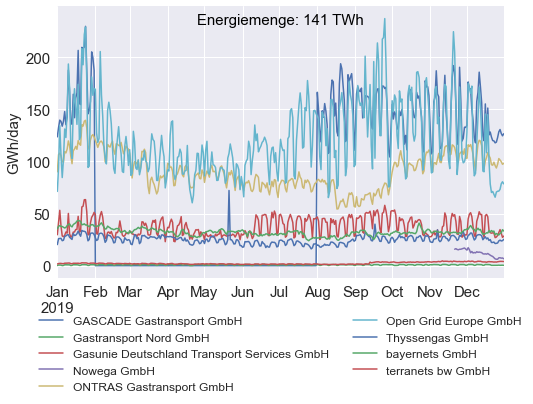

In [147]:
year= 2019
fontsize=15

plt.rcParams.update({'font.size': fontsize})
plt.style.use('seaborn')

figure, ax = plt.subplots(figsize=(8,(8*5/8)))
df_fc.loc[df_fc.index.year==year].plot(ax=ax, linewidth=1.5)
ax.tick_params(axis='both', labelsize=fontsize) 
#ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.2)
ax.set_ylabel('GWh/day', fontsize=fontsize)
ax.set_xlabel(None)
ax.legend(fontsize=12, bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=2)
plt.text(0.5, .95, ('Energiemenge: ' + str(int(round(df_fc.loc[df_fc.index.year==year].sum().sum()/1000,1)))+' TWh'), transform=ax.transAxes,  verticalalignment='center', horizontalalignment='center', color='black')

plt.savefig('./Plots/operators_final_consumers_'+str(year)+'.png', bbox_inches="tight", dpi=150)

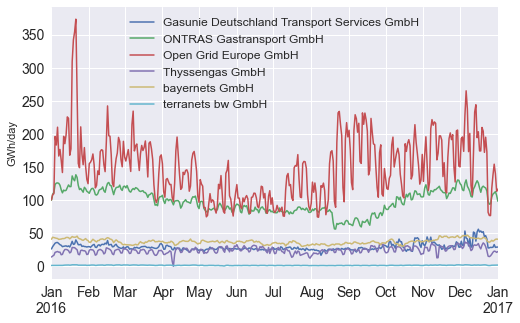

In [246]:
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn')

figure, ax = plt.subplots(figsize=(8,5))
df_fc.plot(ax=ax, linewidth=1.5)
ax.tick_params(axis='both', labelsize=14) 
#ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.2)
ax.set_ylabel('GWh/day')
ax.set_xlabel(None)
ax.legend(fontsize=12)
plt.text(0.8, 0.1, ('Energiemenge: ' + str(int(round(df_fc.sum()/1000,1)))+' TWh'), transform=ax.transAxes,  verticalalignment='center', horizontalalignment='center', color='black')

plt.savefig('./Plots/operators_final_consumers_2016.png', bbox_inches="tight")

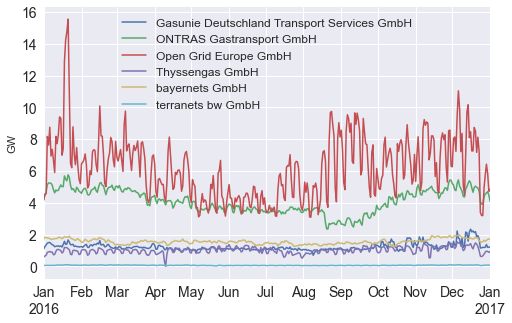

In [251]:
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn')

figure, ax = plt.subplots(figsize=(8,5))
(df_fc/24).plot(ax=ax, linewidth=1.5)
ax.tick_params(axis='both', labelsize=14) 
#ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.2)
ax.set_ylabel('GW')
ax.set_xlabel(None)
ax.legend(fontsize=12)

plt.savefig('./Plots/operators_final_consumers_2016_inGW.png', bbox_inches="tight")

# UGR

In [1]:
from disaggregator.data import *
import matplotlib.pyplot as plt
import pandas as pd
from disaggregator.config import data_out

In [15]:
year = 2020
x = True
year1 = year
if year1 not in range(2000, 2036):
    raise ValueError("`year` must be between 2000 and 2035")
while(x):
    try:
        vb_wz = database_get('spatial', table_id=71, year=year1)
        x = False
    except ValueError:
        year1 -= 1
vb_wz = (vb_wz.assign(WZ=[x[0] for x in vb_wz['internal_id']],
                      ET=[x[1] for x in vb_wz['internal_id']]))
vb_wz = (vb_wz[(vb_wz['ET'] == 12)
               | (vb_wz['ET'] == 18)])[['value', 'WZ', 'ET']]
vb_wz = vb_wz.loc[vb_wz['WZ']
                  .isin(list(wz_dict().keys()))]
vb_wz = vb_wz.replace({'WZ': wz_dict()})
vb_wz['value'] = vb_wz['value'] * 1000 / 3.6
sv_wz_real = (vb_wz.loc[vb_wz['ET'] == 18][['WZ', 'value']]
                   .groupby(by='WZ')[['value']].sum()
                   .rename(columns={'value': 'SV WZ [MWh]'}))
gv_wz_real = (vb_wz.loc[vb_wz['ET'] == 12][['WZ', 'value']]
                   .groupby(by='WZ')[['value']].sum()
                   .rename(columns={'value': 'GV WZ [MWh]'}))

disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2020&&value=gt.0.0
disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2019&&value=gt.0.0
disaggregator.config: INFO     Querying from:
http://opendata.ffe.de:4000/demandregio_spatial?id_spatial=eq.71&&year=eq.2018&&value=gt.0.0


In [18]:
sv_wz_real_TWh = sv_wz_real.rename(columns={"SV WZ [MWh]": "Stromverbrauch [TWh]"}).div(1000000).copy()
gv_wz_real_TWh = gv_wz_real.rename(columns={"GV WZ [MWh]": "Gasverbrauch [TWh]"}).div(1000000).copy()

In [19]:
ev_ugr_TWh = pd.DataFrame([sv_wz_real_TWh['Stromverbrauch [TWh]'], gv_wz_real_TWh['Gasverbrauch [TWh]']]).transpose().copy()


In [20]:
ev_ugr_TWh.loc[ev_ugr_TWh.index!='35'].index

Index(['1', '10-12', '13-15', '16', '17', '18', '19', '2', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '3', '30', '31-32', '33',
       '36', '37', '38-39', '41-42', '43', '45', '46', '47', '49', '5', '50',
       '51', '52', '53', '55-56', '58-63', '6', '64-66', '68', '69-75', '7-9',
       '77-82', '84', '85', '86-88', '90-99'],
      dtype='object', name='WZ')

In [21]:
ev_ugr_TWh_reindex = ev_ugr_TWh.reindex(['1', '2', '3', '5', '6', '7-9', '10-12', '13-15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31-32', '33',
       '36', '37', '38-39', '41-42', '43', '45', '46', '47', '49', '50',
       '51', '52', '53', '55-56', '58-63', '64-66', '68', '69-75', 
       '77-82', '84', '85', '86-88', '90-99'])

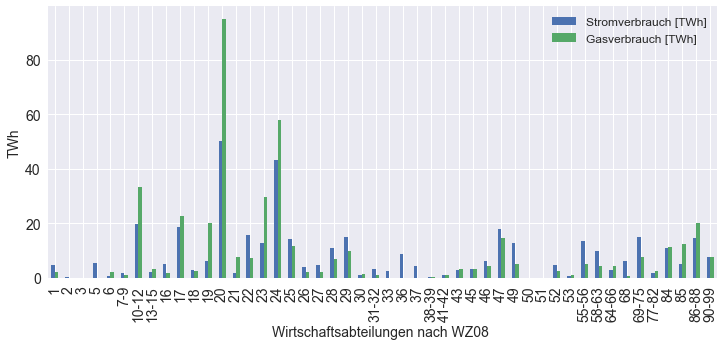

In [24]:
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn')

figure, ax = plt.subplots(figsize=(12,5))
ev_ugr_TWh_reindex.plot(ax=ax, kind='bar', linewidth=1.5)
ax.tick_params(axis='both', labelsize=14) 
# ax.grid(axis='x', color='grey', linestyle='--', linewidth=0.2)
ax.set_ylabel('TWh', fontsize=14)
ax.set_xlabel("Wirtschaftsabteilungen nach WZ08 ", fontsize=14)
ax.legend(fontsize=12)

plt.savefig('./Plots/UGR'+ str(year1) + '.png', bbox_inches="tight")

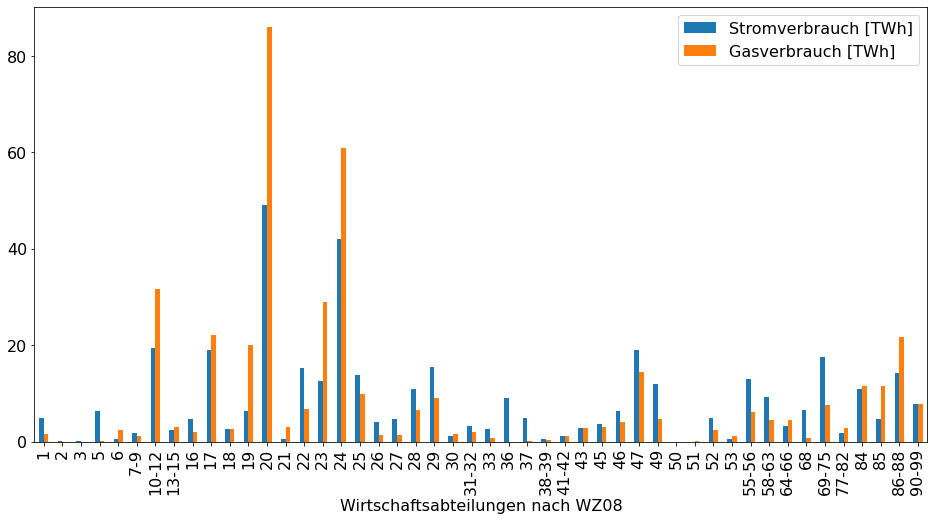

In [7]:
fig, ax = plt.subplots(figsize = (16,8))
ev_ugr_TWh_reindex.plot(ax=ax, kind='bar', fontsize=16)
ax.set_xlabel("Wirtschaftsabteilungen nach WZ08", fontsize=16)
ax.legend(fontsize=16, fancybox=True)
#fig.savefig(data_out('./Plots/UGR.png'), bbox_inches='tight',dpi=300,  transparent=True)